In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
df.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


In [5]:
df.shape

(1949, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [7]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [8]:
df.nunique()

Country name                         166
year                                  16
Life Ladder                         1553
Log GDP per capita                  1500
Social support                       455
Healthy life expectancy at birth     828
Freedom to make life choices         535
Generosity                           609
Perceptions of corruption            572
Positive affect                      431
Negative affect                      374
dtype: int64

In [9]:
df2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [10]:
df2021.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [11]:
df2021.shape

(149, 20)

In [12]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [13]:
df2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [14]:
df2021.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


In [15]:
df2021.nunique()

Country name                                  149
Regional indicator                             10
Ladder score                                  147
Standard error of ladder score                 65
upperwhisker                                  146
lowerwhisker                                  143
Logged GDP per capita                         148
Social support                                119
Healthy life expectancy                       135
Freedom to make life choices                  126
Generosity                                    130
Perceptions of corruption                     130
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              138
Explained by: Social support                  135
Explained by: Healthy life expectancy         119
Explained by: Freedom to make life choices    130
Explained by: Generosity                      119
Explained by: Perceptions of corruption       117
Dystopia + residual                           142


In [16]:
df2021['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2021["Regional indicator"] = le.fit_transform(df2021["Regional indicator"])


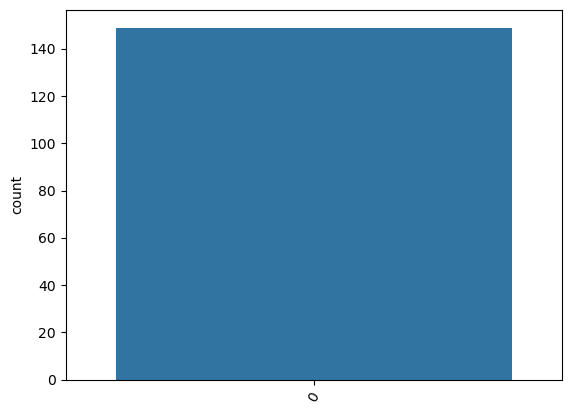

In [18]:

# count regional indicator
sns.countplot(df2021["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()


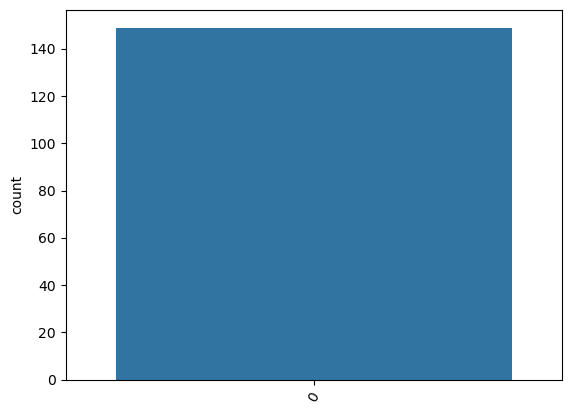

In [19]:
# count regional indicator
sns.countplot(df2021["Regional indicator"])
plt.xticks(rotation = 60)
plt.show()

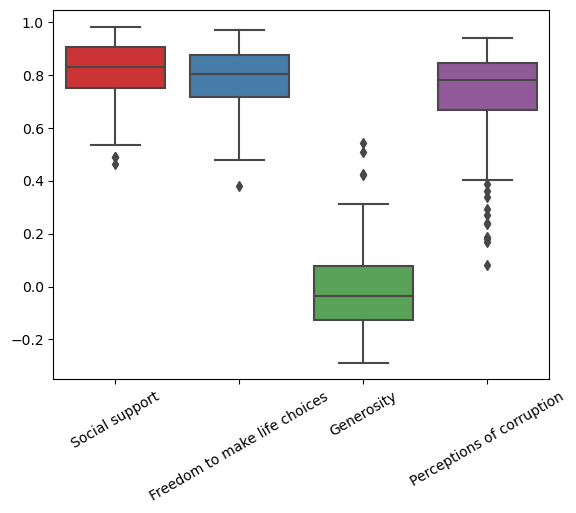

In [20]:
list_features = ["Social support", "Freedom to make life choices", "Generosity","Perceptions of corruption"]
sns.boxplot(data=df2021.loc[:, list_features], orient='v', palette='Set1')
plt.xticks(rotation = 30)
plt.show()

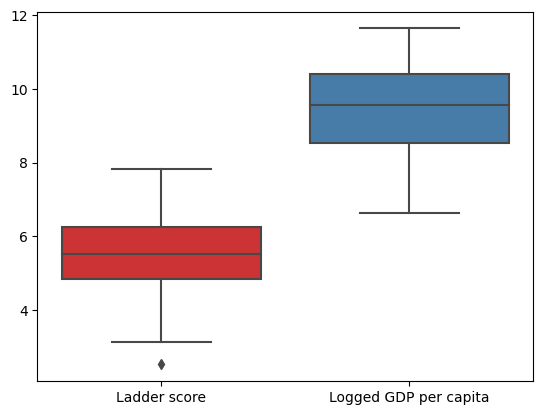

In [21]:
# distribution of features set 2
list_features = ['Ladder score', "Logged GDP per capita"]
sns.boxplot(data = df2021.loc[:, list_features], orient='V', palette='Set1')
plt.show()